# Basit Doğrusal Regresyon - Model Tuning - Model Doğrulama

### Bir web geliştirme şirketi, bir reklam kampanyası yürütmüş ve reklam harcamalarını arttırarak web sitesindeki trafiği arttırmayı hedeflemiştir. Şirket, farklı reklam harcamaları ile web sitesine gelen trafiği ölçen bir veri seti toplamıştır. Bu veri setinde, reklam harcamaları ve web sitesine gelen ziyaretçi sayıları arasındaki ilişkiyi belirlemek istiyoruz. Reklam harcamaları bağımsız değişken, web sitesine gelen ziyaretçi sayısı ise bağımlı değişkendir.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [4]:
# veri setimizi import edelim
data = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


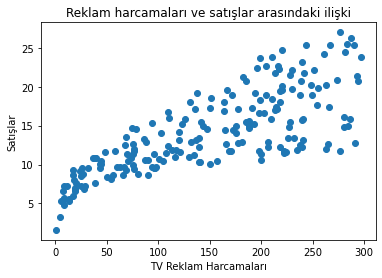

In [5]:
# veri setimizi görselleştirelim.

plt.scatter(data['TV'], data['sales'])
plt.title('Reklam harcamaları ve satışlar arasındaki ilişki')
plt.xlabel('TV Reklam Harcamaları')
plt.ylabel('Satışlar')
plt.show()

In [6]:
# bağımlı ve bağımsız değişkenlerimizi oluşturalım.

X = data['TV'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)

In [7]:
# eğitim ve test setlerimizi ayıralım.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# modelimizi oluşturalım ve eğitelim.

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Tahmin.

y_pred = model.predict(X_test)
y_pred[0:5]

array([[10.47623281],
       [ 9.59288325],
       [11.45159795],
       [20.62095042],
       [15.12301956]])

In [11]:
# R-kare değeri

r2_score = model.score(X_test, y_test)
print('R-kare değeri: ', r2_score)

R-kare değeri:  0.6763151577939721


#### Modelimizin performansını iyileştirmek için, model tuning ve model doğrulama işlemi yapabiliriz. Model tuning, bir modelin hiperparametrelerini değiştirerek, modelin performansını iyileştirmeyi amaçlar. Model doğrulama ise, farklı veri bölümlerinde modelin performansını ölçerek, overfitting veya underfitting problemlerini tespit etmeyi amaçlar.

#### Model tuning işlemi için, sklearn kütüphanesi içinde bulunan GridSearchCV sınıfını kullanabiliriz. Bu sınıf, hiperparametreler için farklı değerleri en iyi parametre kombinasyonunu seçer.

In [15]:
# model tuning işlemi.

params = {'fit_intercept':[True, False], 'normalize':[True, False]}
grid_search = GridSearchCV(model, params, cv=5, verbose=0)
grid_search.fit(X, y)

print('En iyi parametre kombinasyonu: ', grid_search.best_params_)
print('En iyi skor: ', grid_search.best_score_)

En iyi parametre kombinasyonu:  {'fit_intercept': True, 'normalize': True}
En iyi skor:  0.5926000843648255


C:\Users\murat\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\murat\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

#### Model doğrulama işlemi için, cross_val_score fonksiyonunu kullanabiliriz. Bu fonksiyon, veri setini k-folds olarak böler ve her bir k-fold üzerinde modelin performansını ölçer.

In [16]:
scores = cross_val_score(model, X, y, cv=5)
print('Cross-validation skorları: ', scores)

Cross-validation skorları:  [0.59389377 0.68760015 0.56879602 0.64179881 0.47091168]
